# Linear Regression Assignment

**Bike Sharing Dataset**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Data Understanding and Exploration

Import the required libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('day.csv')

In [23]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [28]:
df.shape

(730, 16)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [32]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

Removing dteday column since we already have year, month and  weekday column

In [36]:
df.drop('dteday', inplace=True, axis=1)

In [38]:
#Remove casual and registered column because our target variable is cnt
df.drop(['casual', 'registered'], inplace=True, axis=1)

In [40]:
#Remove instant column since it is just an indexing column
df.drop('instant', inplace=True, axis=1)

In [42]:
# Assigning string values to different seasons instead of numeric values

df['season'] = df['season'].map({ 1:'spring', 2:'summer', 3:'fall', 4:'winter' })

In [44]:
# Checking whether the conversion is done properly or not
df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [46]:
#Mapping  weekday, month to readable value
df.weekday = df.weekday.map({ 0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat' })
df.mnth = df.mnth.map({ 1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec' })

In [48]:
df['weekday'].value_counts()

weekday
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: count, dtype: int64

In [50]:
df['mnth'].value_counts()

mnth
jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: count, dtype: int64

In [52]:
# Replacing long weathersit names into string values for better readability and understanding
df.weathersit = df.weathersit.map({ 1:'clear', 2:'mist', 3:'snow', 4:'rain' })

In [54]:
df['weathersit'].value_counts()

weathersit
clear    463
mist     246
snow      21
Name: count, dtype: int64

## Data Visualisation

Visualising Categorical Variables

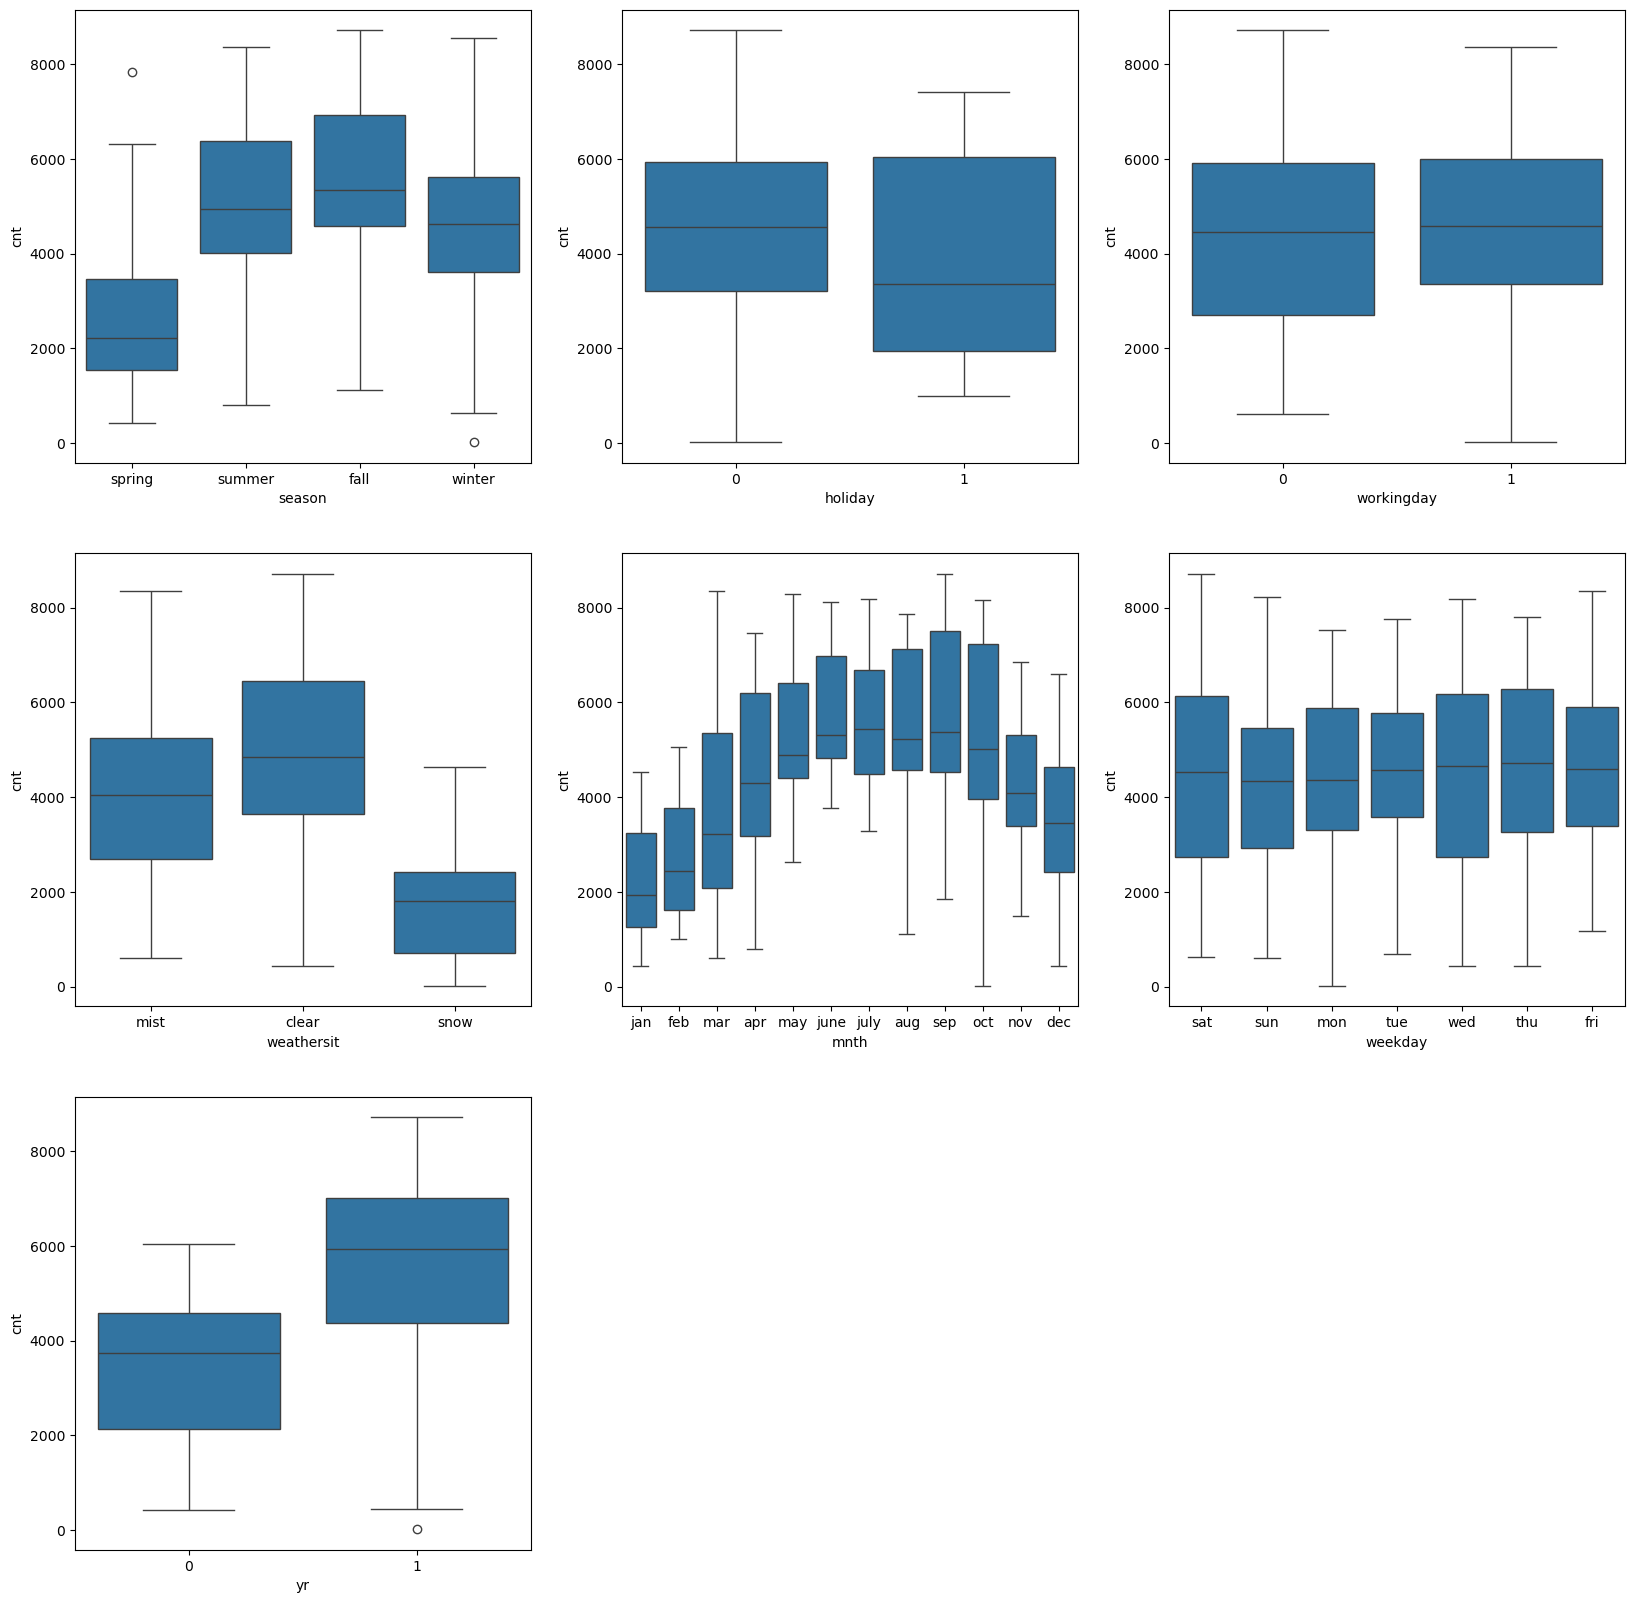

In [58]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

Insights:

weathersit: The demand for shared bikes dropped drastically during snow, and it was high in clear and mist weather,this indicates that weather could be a good predictor

season: The demand for shared bikes was highest in fall, and lowest in spring

month: The demand reached its peak during the middle of year, from June to September

holiday: The median of the demand is lower in holiday compared to non-holiday day

weekday: We can see little difference in demand for shared bikes between days in week

workingday: Booking trends seemed to be almost equal between working and non-working day

year:2019 has more demand than 2018 ,so demand is increasing year by year.

Visualizing Numeric Variables

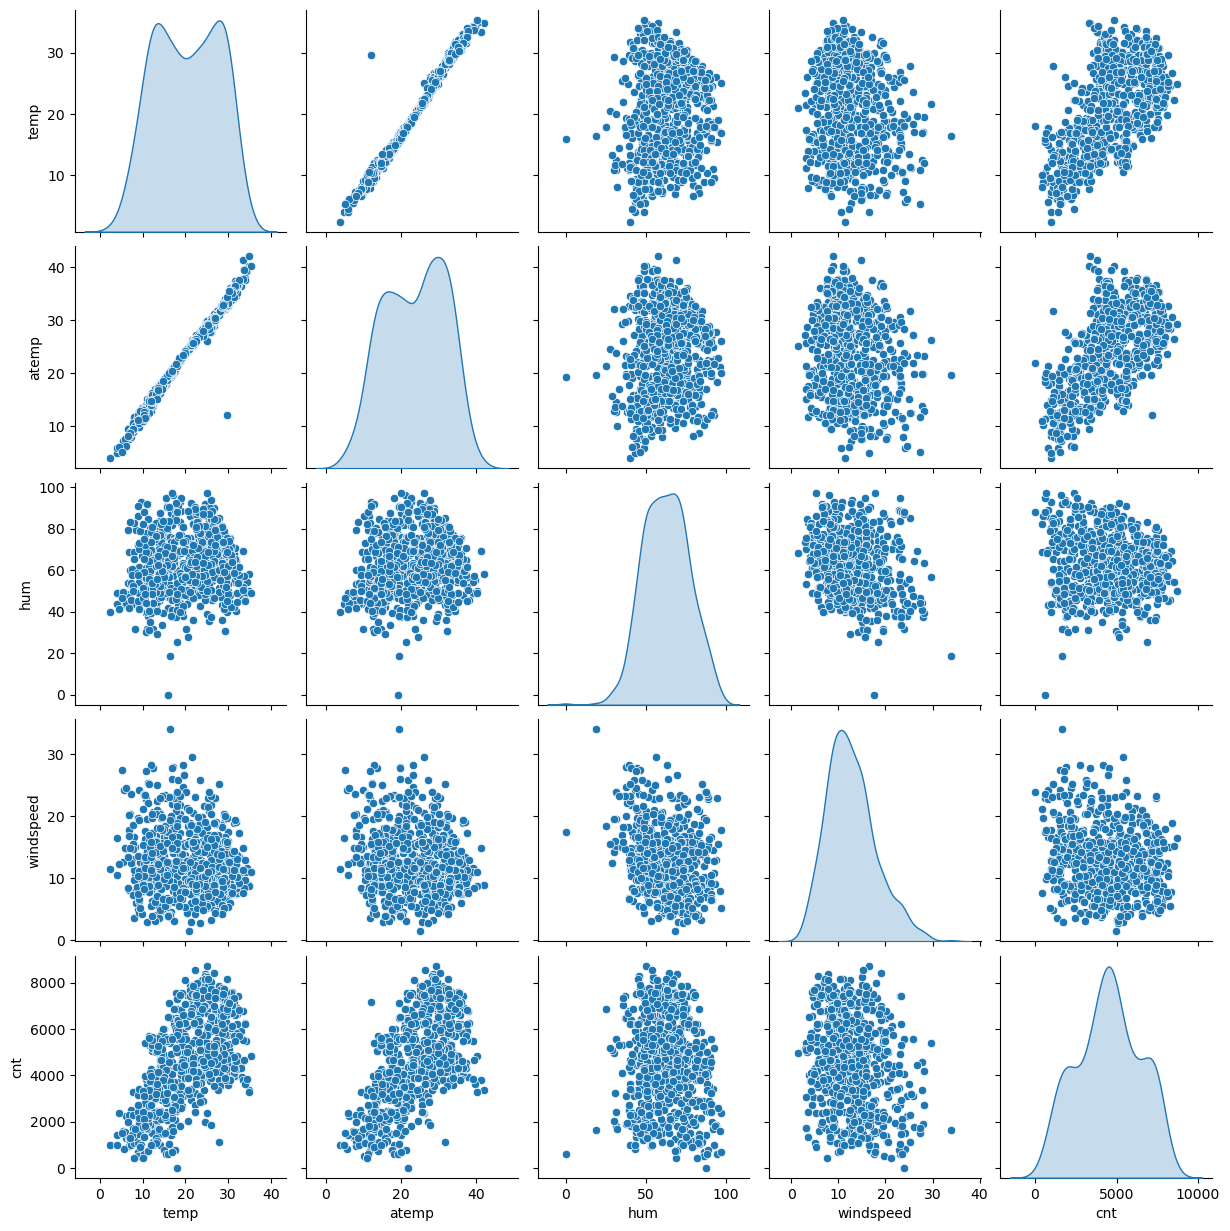

In [64]:
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(df, vars=numerical_vars, diag_kind='kde');
plt.show()

<Axes: >

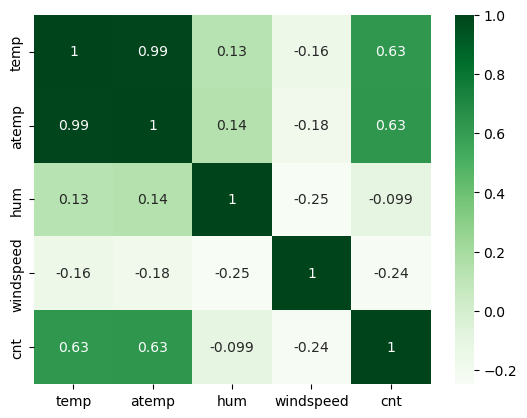

In [66]:
#correlation 
sns.heatmap(df[numerical_vars].corr(),annot=True,cmap="Greens")

**Insights**:

- We can see there is a good correlation between temp and cnt, atemp and cnt
- atemp and temp are highly correlated. The correlation between the two is almost equal to 1.so we can remove atemp
- Count is negatively correlated to windspeed

In [69]:
#removing atemp as it is highly correlated with temp
df.drop('atemp',axis=1,inplace=True) 

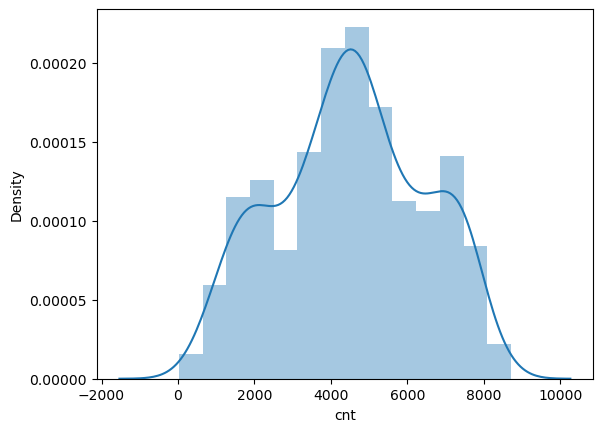

In [71]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(df['cnt'])
plt.show()

## Data Preparation

Creating Dummy Variables

In [75]:
## Convert column that need dummy variables creation to `category` data type
for variable in ['weathersit', 'season', 'mnth', 'weekday']:
    df[variable] = df[variable].astype('category')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [79]:
## Creating dummy variables using pd.get_dummies
category_vars=['weathersit', 'season', 'mnth', 'weekday']
dummy_var = pd.get_dummies(df[category_vars], drop_first=True)

In [81]:
dummy_var.head()

,weathersit_mist,weathersit_snow,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,True,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,True,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [83]:
dummy_var=dummy_var.astype(int)
dummy_var.head()

,weathersit_mist,weathersit_snow,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
# Drop categorical variable columns
df = df.drop(list(df[category_vars].columns), axis=1)

In [87]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,1,9.305237,43.6957,12.522300,1600


In [89]:
# Concatenate dummy variables with the original dataframe
df = pd.concat([df, dummy_var], axis=1)

In [91]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_mist,weathersit_snow,season_spring,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [93]:
df.shape

(730, 29)

## Model Building and Evaluation

Data Splitting

In [98]:
from sklearn.model_selection import train_test_split

## Set random seed for producible train-set dataset
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [99]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_mist,weathersit_snow,season_spring,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [102]:
df_train.shape

(510, 29)

Rescaling the Features

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()

In [109]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [111]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_mist,weathersit_snow,season_spring,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [113]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_mist,weathersit_snow,season_spring,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.343137,0.029412,0.243137,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.475223,0.169124,0.429398,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


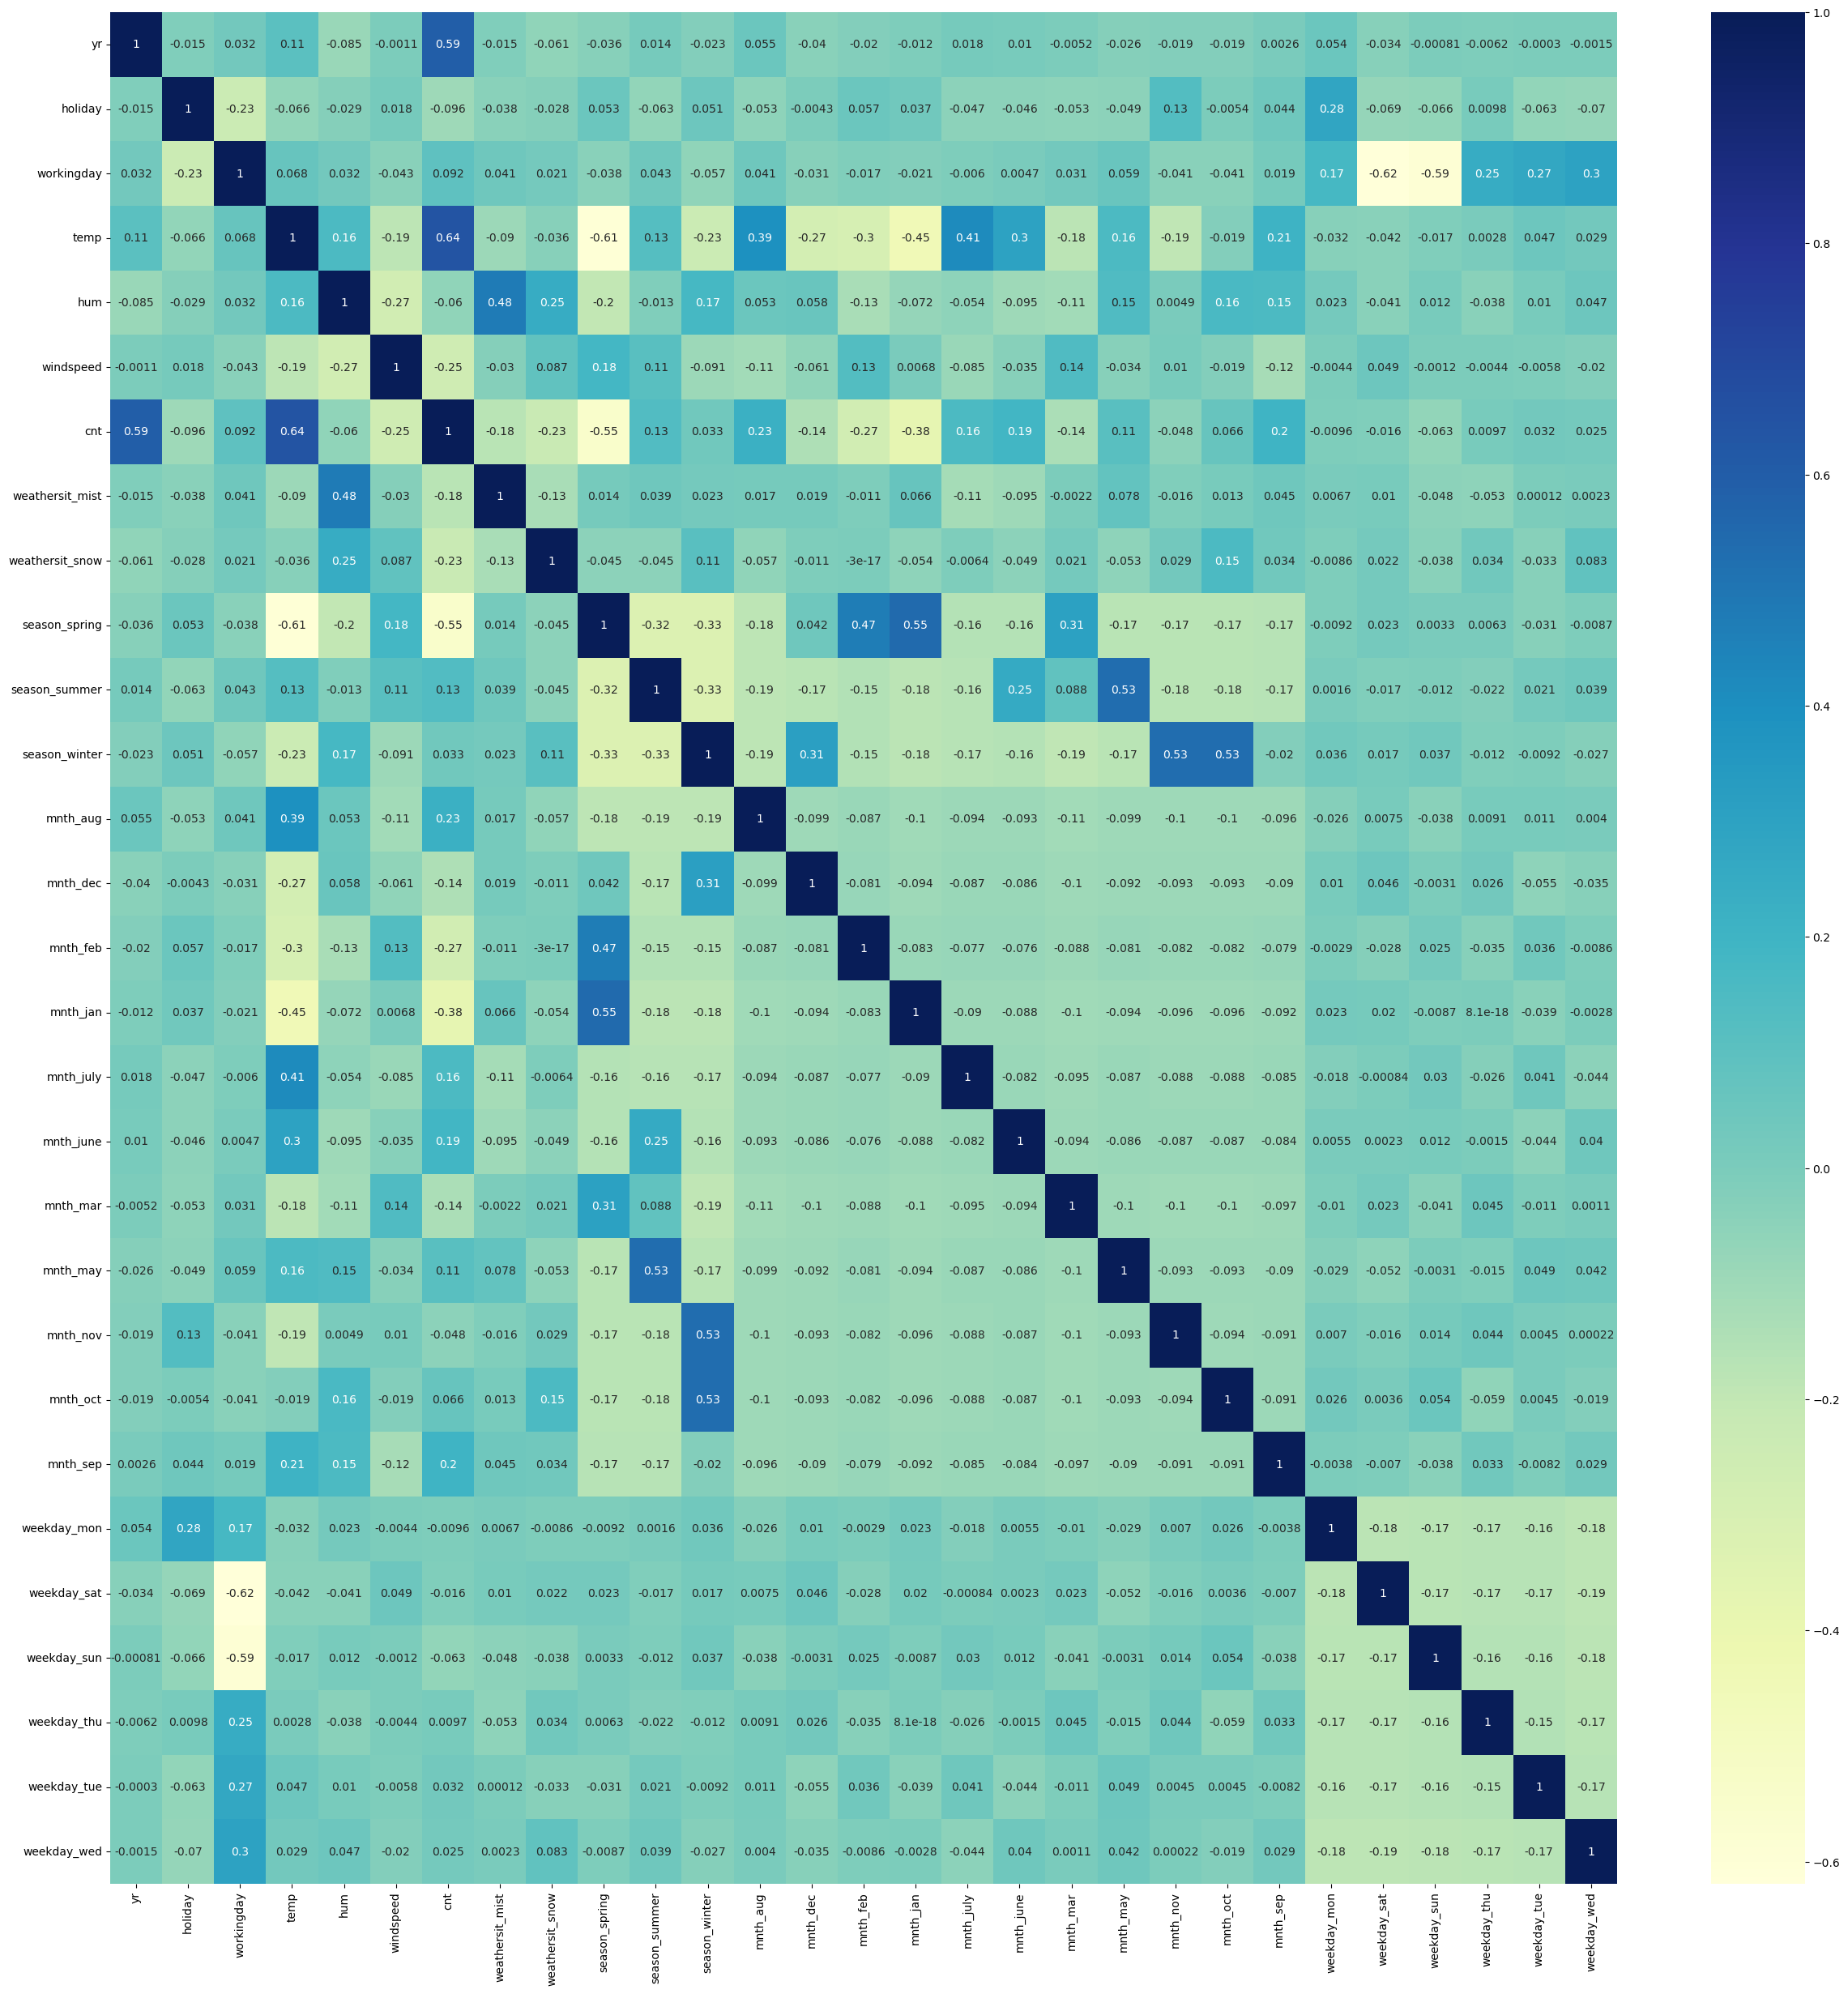

In [115]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, temp seems to the correlated to cnt the most

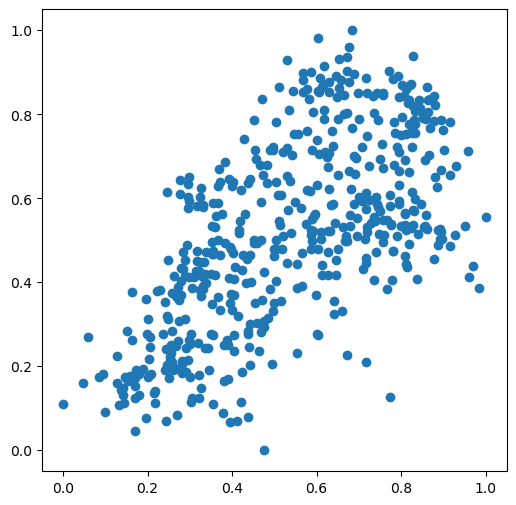

In [118]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Dividing into X and Y sets for the model building

In [121]:
## Drop the target variable
y_train = df_train.pop('cnt')
X_train = df_train

In [123]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [125]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,weathersit_mist,weathersit_snow,season_spring,season_summer,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [127]:
X_train.shape

(510, 28)

**Building the model**

build our first model with all the features

In [131]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const              0.245085
yr                 0.232116
holiday            0.009959
workingday         0.096884
temp               0.450562
hum               -0.151340
windspeed         -0.186453
weathersit_mist   -0.061066
weathersit_snow   -0.257443
season_spring     -0.048159
season_summer      0.038725
season_winter      0.105847
mnth_aug           0.014404
mnth_dec          -0.045586
mnth_feb          -0.032282
mnth_jan          -0.062777
mnth_july         -0.040350
mnth_june         -0.002972
mnth_mar           0.001045
mnth_may           0.023940
mnth_nov          -0.041851
mnth_oct           0.007534
mnth_sep           0.081060
weekday_mon       -0.020907
weekday_sat        0.096389
weekday_sun        0.041853
weekday_thu       -0.009237
weekday_tue       -0.018890
weekday_wed       -0.005388
dtype: float64

In [132]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          8.74e-182
Time:                        10:07:52   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2451      0.035      6.955      0.000       0.176       0.314
yr                  0.2321      0.008     28.820      0.000       0.216       0.248
holiday             0.0100      0.024      0.415      0.678      -0.037       0.057
workingday          0.0969      0.012      7.905      0.000       0.073       0.121
temp                0.4506      0.046      9.734      0.000       0.360       0.542
hum                -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed          -0.1865      0.026     -7.257      0.000      -0.237      -0.136
weathersit_mist    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_snow    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
season_spring      -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer       0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter       0.1058      0.028      3.794      0.000       0.051       0.161
mnth_aug            0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_dec           -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_feb           -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_jan           -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_july          -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_june          -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_mar            0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_may            0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_nov           -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_oct            0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_sep            0.0811      0.032      2.533      0.012       0.018       0.144
weekday_mon        -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_sat         0.0964      0.014      7.029      0.000       0.069       0.123
weekday_sun         0.0419      0.014      3.006      0.003       0.014       0.069
weekday_thu        -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_tue        -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_wed        -0.0054      0.015     -0.362      0.718      -0.035       0.024
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.39e+16


Checking VIF

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.58
23,weekday_sat,19.72
24,weekday_sun,18.35
8,season_spring,10.79
10,season_winter,9.50
9,season_summer,8.29
3,temp,7.12
19,mnth_nov,6.80
20,mnth_oct,6.59
11,mnth_aug,6.43


**RFE selections**

In [143]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [144]:
# Running RFE with the output number of the variable equal to 8
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 8)           # running RFE
rfe = rfe.fit(X_train, y_train)

In [147]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_mist', False, 4),
 ('weathersit_snow', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', False, 2),
 ('mnth_aug', False, 13),
 ('mnth_dec', False, 10),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 8),
 ('mnth_july', True, 1),
 ('mnth_june', False, 19),
 ('mnth_mar', False, 20),
 ('mnth_may', False, 12),
 ('mnth_nov', False, 9),
 ('mnth_oct', False, 16),
 ('mnth_sep', False, 3),
 ('weekday_mon', False, 15),
 ('weekday_sat', False, 6),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 18),
 ('weekday_tue', False, 21),
 ('weekday_wed', False, 17)]

In [149]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weathersit_snow',
       'season_spring', 'mnth_july'],
      dtype='object')

In [151]:
X_train.columns[~rfe.support_]

Index(['workingday', 'weathersit_mist', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

Building model using statsmodel

In [155]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [157]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [159]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [161]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.0
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          8.21e-179
Time:                        10:08:06   Log-Likelihood:                 470.39
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     501   BIC:                            -884.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4318      0.030     

Now let's check the VIF for these selected features and decide further

In [164]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [166]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.49
2,temp,10.38
4,windspeed,3.89
0,yr,2.03
6,season_spring,1.80
7,mnth_july,1.35
5,weathersit_snow,1.11
1,holiday,1.03


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5.So let's try removing 'hum' first having the maximum VIF and then check for it again

In [169]:
# Let's drop the 'hum' column
X_train_rfe.drop("hum",axis=1,inplace=True)
X_train_rfe

,const,yr,holiday,temp,windspeed,weathersit_snow,season_spring,mnth_july
653,1.0,1,0,0.509887,0.300794,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1
426,1.0,1,0,0.442393,0.255342,0,1,0
728,1.0,1,0,0.245101,0.663106,0,1,0
482,1.0,1,0,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0
53,1.0,0,0,0.202618,0.111379,0,1,0
350,1.0,0,0,0.248216,0.431816,0,0,0


In [171]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Now that we have removed one variable, let's fit the model 
lm = sm.OLS(y_train, X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     279.8
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          9.08e-169
Time:                        10:08:10   Log-Likelihood:                 443.86
No. Observations:                 510   AIC:                            -871.7
Df Residuals:                     502   BIC:                            -837.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2627      0.020     

In [173]:
X_train_new1 = X_train_rfe.drop(['const'], axis=1)

In [175]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.95
3,windspeed,3.73
0,yr,2.03
5,season_spring,1.50
6,mnth_july,1.26
4,weathersit_snow,1.05
1,holiday,1.03


Insights

Overall, the model looks good, all of the features has a very low VIF and p-value. We will consider this model is our final model.

F-Statistics value of 279.8 (which is greater than 1) and the Prob (F-statistic) of 9.08e-169 i.e almost equals to zero, indicates that the overall model is significant

## Residual Analysis of the train data

In [180]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

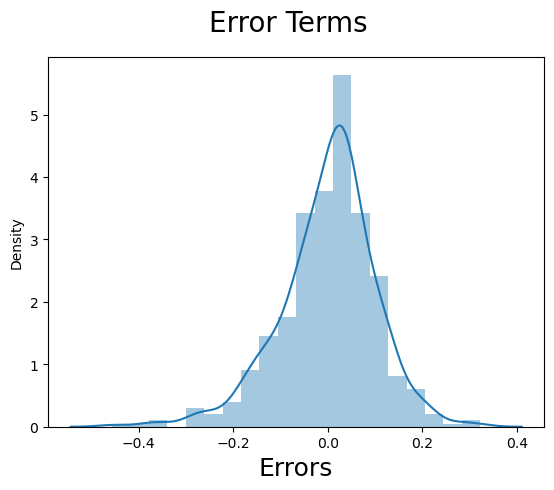

In [182]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

From the above graph, we can see that Residuals are normally distributed. So our assumption for Linear Regression is valid.

## Making Predictions

In [186]:
var

['temp', 'hum', 'windspeed', 'cnt']

Applying the scaling on the test sets

In [189]:
df_test[var] = scaler.transform(df_test[var])

In [191]:
y_test = df_test.pop('cnt')
X_test = df_test

In [193]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,weathersit_mist,weathersit_snow,season_spring,season_summer,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
184,0,1,0,0.831783,0.657364,0.084219,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [195]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [197]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [199]:
y_pred.shape

(219,)

## Model Evaluation

Text(0, 0.5, 'y_pred')

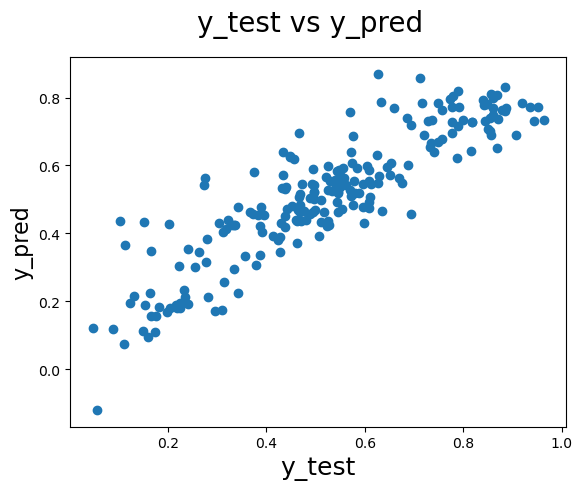

In [202]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and the adjusted R-squared value for the test set.

In [205]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred);
r2

0.7835777059426585

In [207]:
#Adjusted R^2 for test dataset
n = X_test.shape[0] # Number of rows
p = X_test.shape[1] # Number of features (Num of columns)

adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
adjusted_r2

0.7516838941868398

**Final Result**

Train R^2: 0.796

Train Adjusted R^2: 0.793

Test R^2: 0.783

Train Adjusted R^2: 0.751

Thus, for the model with 7 variables, the r-squared on training and test data is about 79.6% and 78.3% respectively. The adjusted r-squared on the train and test set is about is about 79.3% and 75.1% respectively

Checking the correlations between the final predictor variables

In [214]:
col=X_train_new1.columns
col

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_snow',
       'season_spring', 'mnth_july'],
      dtype='object')

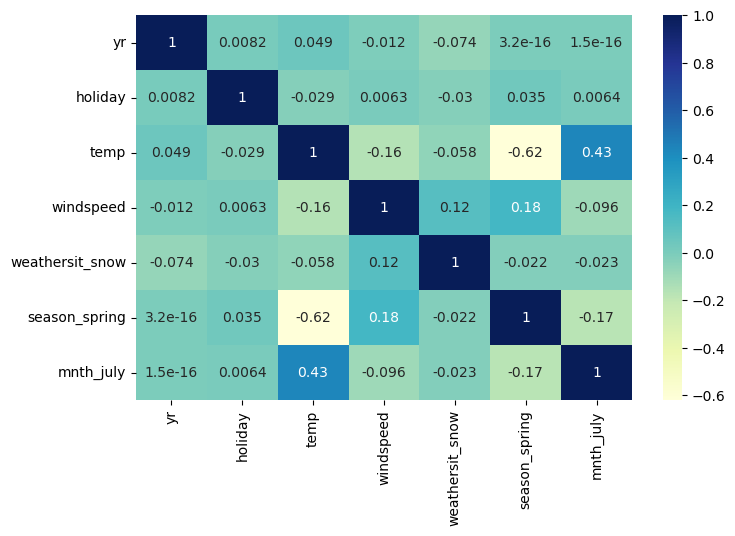

In [216]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(df[col].corr(), cmap="YlGnBu", annot=True)
plt.show()

Equation of best fitted line

In [219]:
round(lm.params,4)

const              0.2627
yr                 0.2357
holiday           -0.0748
temp               0.4258
windspeed         -0.1519
weathersit_snow   -0.2434
season_spring     -0.1407
mnth_july         -0.0726
dtype: float64

**Conclusion**

After our final model, we can see the top predictor variables:

Temperature temp has a coefficient value of 0.4258, which indicates that it is a strong predictor variable influence the shared bike demand

Year yr has a coefficient value of 0.2357, that means the demand for shared bike will increase as year increase

weather weathersit_snow  has a coefficient value of -0.2434, which indicates that if it a snow day that will affect the booking of shared bikes

Windspeed  has a coefficient value of -0.1519, indicates that strong wind will affect the booking of shared bikes

Thus, for the model with 7 variables, the r-squared on training and test data is about 79.6% and 78.3% respectively. The adjusted r-squared on the train and test set is about is about 79.3% and 75.1% respectively